# Analyze Electrodermal Activity (EDA)

This example shows how to use NeuroKit2 to extract the features from Electrodermal Activity (EDA) .

In [6]:
# Load the NeuroKit package and other useful packages
import neurokit2 as nk
import matplotlib.pyplot as plt

In [7]:
plt.rcParams['figure.figsize'] = [15, 5]  # Bigger images

## Extract the cleaned ECG signal


In this example, we will use a simulated EDA signal. However, you can use any signal you have generated (for instance, extracted from the dataframe using [read_acqknowledge()](https://neurokit2.readthedocs.io/en/latest/functions.html#neurokit2.read_acqknowledge).


In [9]:
# Simulate 10 seconds of EDA Signal (recorded at 250 samples / second)
eda_signal = nk.eda_simulate(duration=10, sampling_rate=250, scr_number=3, drift=0.01)


Once you have a raw EDA signal in the shape of a vector (i.e., a one-dimensional array), or a list, you can use [eda_process()](https://neurokit2.readthedocs.io/en/latest/functions.html#neurokit2.eda_process) to process it.


In [10]:
# Process the raw EDA signal
signals, info = nk.eda_process(eda_signal, sampling_rate=250)

*Note: It is critical that you specify the correct sampling rate of your signal throughout many processing functions, as this allows NeuroKit to have a time reference.*


This function outputs two elements, a *dataframe* containing the different signals (e.g., the raw signal, clean signal, SCR samples marking the different features etc.), and a *dictionary* containing information about the Skin Conductance Response (SCR) peaks (e.g., onsets, peak amplitude etc.).

## Locate Skin Conductance Response (SCR) features

The processing function does two important things for our purpose: Firstly, it cleans the signal. Secondly, it detects the location of 1) peak onsets, 2) peak amplitude, and 3) half-recovery time. Let's extract these from the output.

In [11]:
# Extract clean EDA and SCR features
cleaned = signals["EDA_Clean"]
features = [info["SCR_Onsets"], info["SCR_Peaks"], info["SCR_Recovery"]]

We can now visualize the location of the peak onsets, the peak amplitude, as well as the half-recovery time points in the cleaned EDA signal, respectively marked by the red dashed line, blue dashed line, and orange dashed line.

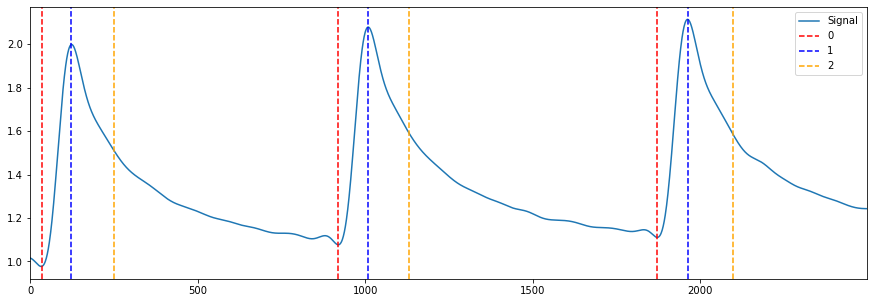

In [12]:
# Visualize SCR features in cleaned EDA signal
plot = nk.events_plot(features, cleaned, color=['red', 'blue', 'orange'])


## Decompose EDA into Phasic and Tonic components

We can also decompose the EDA signal into its phasic and tonic components, or more specifically, the ***Phasic Skin Conductance Response (SCR)*** and the ***Tonic Skin Conductance Level (SCL)*** respectively.
The SCR represents the stimulus-dependent fast changing signal whereas the SCL is slow-changing and continuous. Separating these two signals helps to provide a more accurate estimation of the true SCR amplitude.

In [13]:
# Filter phasic and tonic components
data = nk.eda_phasic(nk.standardize(eda_signal), sampling_rate=250)

*Note: here we **standardized** the raw EDA signal before the decomposition, which can be useful in the presence of high inter-individual variations.*

We can now add the raw signal to the dataframe containing the two signals, and plot them!

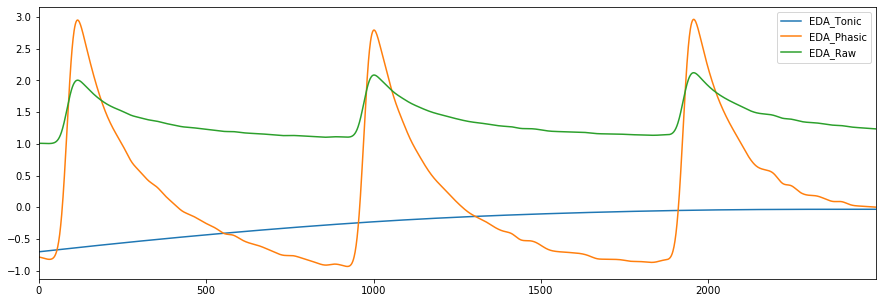

In [14]:
data["EDA_Raw"] = eda_signal  # Add raw signal
data.plot()

## Quick Plot

You can obtain all of these features by using the [eda_plot()](https://neurokit2.readthedocs.io/en/latest/functions.html#neurokit2.eda_plot) function on the dataframe of processed EDA.

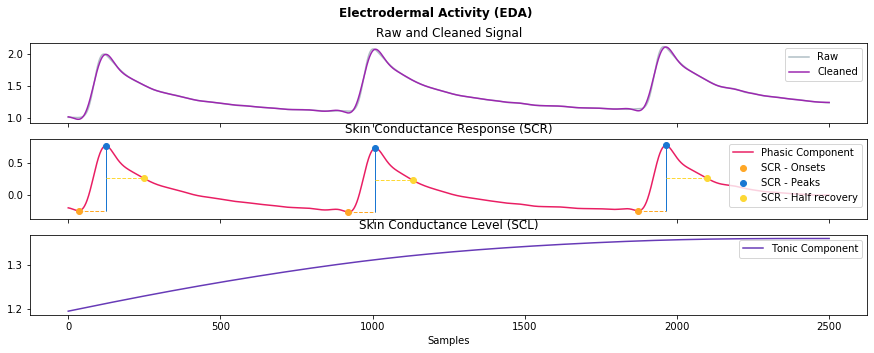

In [15]:
# Plot EDA signal
plot = nk.eda_plot(signals)